# 0918
## 증가율 그룹 인사이트 도출

In [1]:
#필요라이브러리 다운로드 
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform 

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

#그래프에서 마이너스 표시되게
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
df = pd.read_csv('master_did_210917.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gameCode        138593 non-null  int64  
 1   gameName        138593 non-null  object 
 2   gameRank        138593 non-null  int64  
 3   gameRankUpDown  138593 non-null  int64  
 4   gameShares      138593 non-null  float64
 5   gameTypeShares  138593 non-null  float64
 6   sharesUpDown    138593 non-null  float64
 7   timeCountTotal  138593 non-null  int64  
 8   avgUsedTime     138593 non-null  int64  
 9   userCountTotal  138593 non-null  int64  
 10  useStoreCount   138593 non-null  int64  
 11  gameRegDate     138593 non-null  object 
 12  publisher       138593 non-null  object 
 13  payType         138593 non-null  object 
 14  gameTypeName    138593 non-null  object 
 15  date            138593 non-null  object 
 16  dateCount       138593 non-null  int64  
dtypes: float64

In [5]:
df.head(10)

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17,735
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17,735
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17,735
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17,735
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17,735
5,12,메이플스토리,6,1,4.04,25.56,0.10,316134817,6081,51992,4504,1970-01-01,넥슨,P,RPG,2019-01-17,735
6,1,서든어택,7,-1,3.82,11.90,-0.15,298825999,3754,79606,4553,1970-01-01,넥슨,P,FPS,2019-01-17,735
7,13,카트라이더,8,0,3.17,97.90,0.26,248358379,2423,102511,4587,1970-01-01,넥슨,P,레이싱,2019-01-17,735
8,2,스타크래프트 리마스터,9,0,2.59,7.11,-0.02,202345385,4592,44069,4485,1970-01-01,블리자드,P,RTS,2019-01-17,735
9,9,던전앤파이터,10,0,1.48,54.55,0.07,115662154,5553,20829,3900,1970-01-01,넥슨,P,액션,2019-01-17,735


- 2019-01-20 대비 2021-01-20 증가율 변수 추가

In [15]:
#전체 데이터에서 train 데이터에 해당하는 행 추출
df = df.query('dateCount==735').reset_index(drop=True)

In [16]:
df[['dateCount']]

,dateCount
0,735
1,735
2,735
3,735
4,735
...,...
123475,735
123476,735
123477,735
123478,735


In [32]:
#게임 코드 리스트
df[['gameCode']].value_counts().sort_index(ascending=True)

gameCode
1           735
2           735
3           735
4           735
5           735
           ... 
811         735
823         735
828         735
831         735
840         735
Length: 168, dtype: int64

In [56]:
#증가율 계산
df['updown'] = df.sort_values(['date']).groupby(['gameCode']).timeCountTotal.pct_change()

In [57]:
df[['updown']].describe()

,updown
count,123312.000000
mean,0.043331
std,0.922482
min,-0.997653
25%,-0.111628
50%,0.004193
75%,0.140488
max,232.523810


<AxesSubplot:>

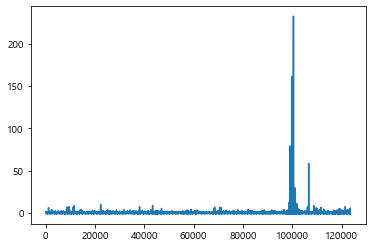

In [68]:
df['updown'].plot()

In [61]:
#증가율 계산
df['updown2'] = df.sort_values(['date']).groupby(['gameCode']).timeCountTotal.pct_change(periods=734)

In [62]:
df['updown2'].describe()

count    168.000000
mean      -0.448923
std        0.439006
min       -0.994637
25%       -0.656844
50%       -0.511231
75%       -0.348518
max        3.027899
Name: updown2, dtype: float64

In [69]:
df['updown2'].quantile()

-0.5112311154553448

<AxesSubplot:>

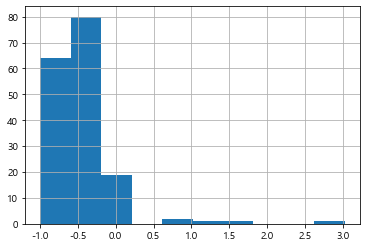

In [67]:
df['updown2'].hist()

In [36]:
## 데이터 타입을 출력
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [25]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df, i):
    # 상점별로 데이터를 뽑습니다.
    game = df[df['gameCode']==i]
    ## 날짜 지정 범위는 영업 시작 월부터 2021년 1월 전까지 영업 마감일 기준
    index = pd.date_range(min(game['date']),'2021-01-20',freq='d') 
    ## 시리즈 객체로 변환
    ts = pd.Series(game['timeCountTotal'].values,index=index)
    return ts

In [26]:
# 게임코드가 1인 데이터를 시리즈 객체로 변환
game_1 = time_series(df, 1)
game_1

2019-01-17    298825999
2019-01-18    333330856
2019-01-19    410126186
2019-01-20    419402270
2019-01-21    325665340
                ...    
2021-01-16    364107887
2021-01-17    382098311
2021-01-18    272698339
2021-01-19    264455556
2021-01-20    265478644
Freq: D, Length: 735, dtype: int64

In [27]:
## 데이터 타입을 출력
print(type(game_1))

<class 'pandas.core.series.Series'>


<AxesSubplot:>

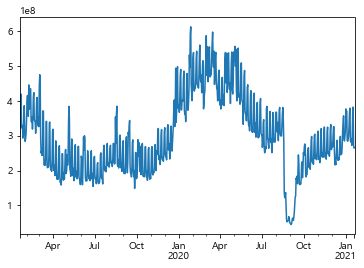

In [28]:
game_1.plot()

<AxesSubplot:>

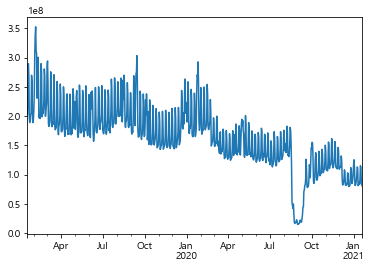

In [33]:
game_2 = time_series(df, 2)
game_2.plot()

<AxesSubplot:>

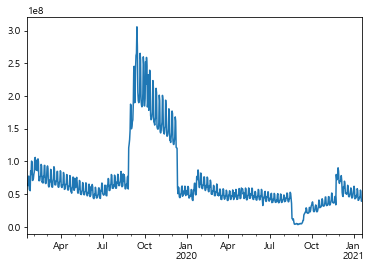

In [34]:
game_3 = time_series(df, 3)
game_3.plot()

In [72]:
df.head()

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,useStoreCount,gameRegDate,publisher,payType,gameTypeName,date,dateCount,updown,updown2
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,4755,2011-12-22,라이엇게임즈,P,RTS,2019-01-17,735,NaN,NaN
1,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,4692,2017-06-26,카카오/스팀,P,FPS,2019-01-17,735,NaN,NaN
2,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,4687,2017-12-14,넥슨,P,스포츠,2019-01-17,735,NaN,NaN
3,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,4650,2016-05-24,블리자드,P,FPS,2019-01-17,735,NaN,NaN
4,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,4501,2018-10-29,스마일게이트,P,RPG,2019-01-17,735,NaN,NaN


# 변수 전부 넣은 파일

In [95]:
df = pd.read_csv("master_did_210918.csv")
up = pd.read_csv('game_updown.csv')

In [96]:
df.head()

,Unnamed: 0,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,...,payType,gameTypeName,date,dateCount,ram_min,singlePlay,teamPlay,PvE,PvP,gaming_interaction
0,0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,...,P,RTS,2019-01-17 00:00:00,735,2.0,0.0,1.0,0.0,1.0,1.0
1,1,545,리그 오브 레전드,1,0,32.64,89.43,0.04,2789391932,5751,...,P,RTS,2019-01-18 00:00:00,735,2.0,0.0,1.0,0.0,1.0,1.0
2,2,545,리그 오브 레전드,1,0,32.61,89.25,-0.02,3569515214,6057,...,P,RTS,2019-01-19 00:00:00,735,2.0,0.0,1.0,0.0,1.0,1.0
3,3,545,리그 오브 레전드,1,0,32.67,89.69,0.07,3579861781,6175,...,P,RTS,2019-01-20 00:00:00,735,2.0,0.0,1.0,0.0,1.0,1.0
4,4,545,리그 오브 레전드,1,0,32.89,90.04,0.22,2617928106,6011,...,P,RTS,2019-01-21 00:00:00,735,2.0,0.0,1.0,0.0,1.0,1.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          138593 non-null  int64  
 1   gameCode            138593 non-null  int64  
 2   gameName            138593 non-null  object 
 3   gameRank            138593 non-null  int64  
 4   gameRankUpDown      138593 non-null  int64  
 5   gameShares          138593 non-null  float64
 6   gameTypeShares      138593 non-null  float64
 7   sharesUpDown        138593 non-null  float64
 8   timeCountTotal      138593 non-null  int64  
 9   avgUsedTime         138593 non-null  int64  
 10  userCountTotal      138593 non-null  int64  
 11  useStoreCount       138593 non-null  int64  
 12  gameRegDate         138593 non-null  object 
 13  publisher           138593 non-null  object 
 14  payType             138593 non-null  object 
 15  gameTypeName        138593 non-nul

In [98]:
#결측치 확인
df[df['ram_min'].isnull()]

,Unnamed: 0,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,...,payType,gameTypeName,date,dateCount,ram_min,singlePlay,teamPlay,PvE,PvP,gaming_interaction
49980,49980,477,한게임 신사천성,73,6,0.04,2.53,0.00,3064359,2970,...,F,보드,2019-01-17 00:00:00,735,NaN,1.0,1.0,0.0,1.0,1.0
49981,49981,477,한게임 신사천성,75,-2,0.04,2.44,0.00,3076828,2821,...,F,보드,2019-01-18 00:00:00,735,NaN,1.0,1.0,0.0,1.0,1.0
49982,49982,477,한게임 신사천성,86,-11,0.03,2.29,-0.01,3158363,2874,...,F,보드,2019-01-19 00:00:00,735,NaN,1.0,1.0,0.0,1.0,1.0
49983,49983,477,한게임 신사천성,83,3,0.04,2.44,0.01,3347164,2909,...,F,보드,2019-01-20 00:00:00,735,NaN,1.0,1.0,0.0,1.0,1.0
49984,49984,477,한게임 신사천성,73,10,0.04,2.53,0.00,3145935,3005,...,F,보드,2019-01-21 00:00:00,735,NaN,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138588,138588,971,Cyberpunk 2077,118,-15,0.02,0.08,0.00,673302,7014,...,P,RPG,2021-01-16 00:00:00,42,NaN,NaN,NaN,NaN,NaN,NaN
138589,138589,971,Cyberpunk 2077,126,-8,0.01,0.07,-0.01,592495,6511,...,P,RPG,2021-01-17 00:00:00,42,NaN,NaN,NaN,NaN,NaN,NaN
138590,138590,971,Cyberpunk 2077,138,-12,0.01,0.06,0.00,335612,8186,...,P,RPG,2021-01-18 00:00:00,42,NaN,NaN,NaN,NaN,NaN,NaN
138591,138591,971,Cyberpunk 2077,127,11,0.01,0.07,0.00,407664,7994,...,P,RPG,2021-01-19 00:00:00,42,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
up.head()

,gameName,2019_avg,2020_avg,2021_avg,updown_a,updown_b,updown_c,med_high_a,med_high_b,med_high_c
0,7DaysToDie,2.561061e+05,5.728945e+05,410609.50,2.236942,0.716728,1.603279,1,1,1
1,AMONG US,NaN,2.624854e+06,673860.65,NaN,0.256723,NaN,1,0,1
2,ANTHEM,9.117434e+04,1.551688e+04,14629.80,0.170189,0.942831,0.160460,0,1,0
3,APEX LEGENDS,2.668435e+07,7.991697e+06,7225972.10,0.299490,0.904185,0.270794,0,1,0
4,ARK:Survival Evolved,3.611100e+06,2.344689e+06,1149103.70,0.649300,0.490088,0.318214,0,0,0


In [100]:
df = pd.merge(df, up, how='left', on='gameName')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138593 entries, 0 to 138592
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          138593 non-null  int64  
 1   gameCode            138593 non-null  int64  
 2   gameName            138593 non-null  object 
 3   gameRank            138593 non-null  int64  
 4   gameRankUpDown      138593 non-null  int64  
 5   gameShares          138593 non-null  float64
 6   gameTypeShares      138593 non-null  float64
 7   sharesUpDown        138593 non-null  float64
 8   timeCountTotal      138593 non-null  int64  
 9   avgUsedTime         138593 non-null  int64  
 10  userCountTotal      138593 non-null  int64  
 11  useStoreCount       138593 non-null  int64  
 12  gameRegDate         138593 non-null  object 
 13  publisher           138593 non-null  object 
 14  payType             138593 non-null  object 
 15  gameTypeName        138593 non-nul

In [83]:
df.to_csv('master_did_210918_2.csv')

In [132]:
df = pd.read_csv('master_did_210918_2.csv')

In [102]:
#전체 데이터에서 train 데이터에 해당하는 행 추출
df = df.query('dateCount==735').reset_index(drop=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          138593 non-null  int64  
 1   Unnamed: 0.1        138593 non-null  int64  
 2   gameCode            138593 non-null  int64  
 3   gameName            138593 non-null  object 
 4   gameRank            138593 non-null  int64  
 5   gameRankUpDown      138593 non-null  int64  
 6   gameShares          138593 non-null  float64
 7   gameTypeShares      138593 non-null  float64
 8   sharesUpDown        138593 non-null  float64
 9   timeCountTotal      138593 non-null  int64  
 10  avgUsedTime         138593 non-null  int64  
 11  userCountTotal      138593 non-null  int64  
 12  useStoreCount       138593 non-null  int64  
 13  gameRegDate         138593 non-null  object 
 14  publisher           138593 non-null  object 
 15  payType             138593 non-nul

In [134]:
df = df.drop(df[['Unnamed: 0']], axis=1)

In [105]:
df.head()

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gaming_interaction,2019_avg,2020_avg,2021_avg,updown_a,updown_b,updown_c,med_high_a,med_high_b,med_high_c
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.68909,0.617556,1,1,1
1,545,리그 오브 레전드,1,0,32.64,89.43,0.04,2789391932,5751,485028,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.68909,0.617556,1,1,1
2,545,리그 오브 레전드,1,0,32.61,89.25,-0.02,3569515214,6057,589348,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.68909,0.617556,1,1,1
3,545,리그 오브 레전드,1,0,32.67,89.69,0.07,3579861781,6175,579773,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.68909,0.617556,1,1,1
4,545,리그 오브 레전드,1,0,32.89,90.04,0.22,2617928106,6011,435538,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.68909,0.617556,1,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

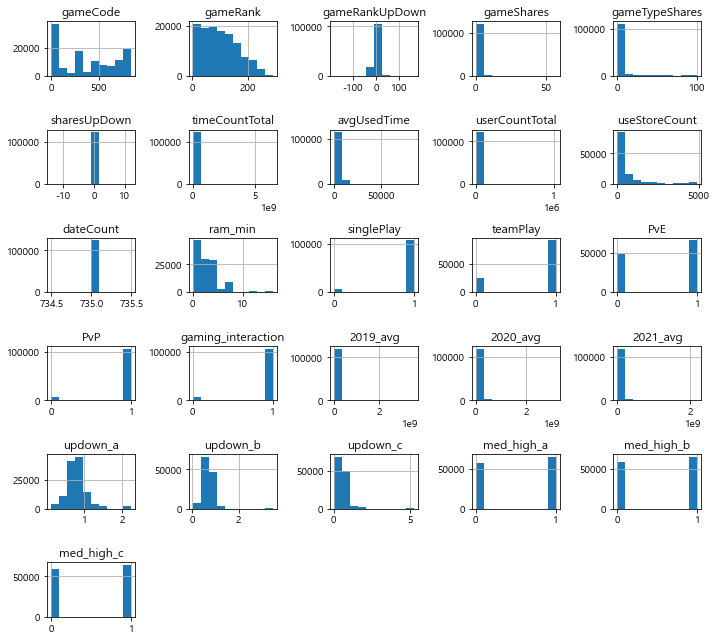

In [106]:
#데이터 시각화
df.hist(figsize=(10,9))
plt.tight_layout() #그래프 간격설정
plt.show

In [107]:
#게임 리스트
df2 = df.drop_duplicates(['gameCode'], keep='first') #중복제거
df2

,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gaming_interaction,2019_avg,2020_avg,2021_avg,updown_a,updown_b,updown_c,med_high_a,med_high_b,med_high_c
0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,434422,...,1.0,3.546637e+09,3.178464e+09,2.190247e+09,0.896191,0.689090,0.617556,1,1,1
735,737,배틀그라운드,2,0,19.64,61.31,1.23,1539932964,5037,305759,...,1.0,1.125021e+09,4.856058e+08,3.035629e+08,0.431641,0.625122,0.269829,0,0,0
1470,750,피파온라인4,3,0,7.11,92.05,-0.40,557364347,2866,194528,...,1.0,6.318409e+08,4.334441e+08,3.481555e+08,0.686002,0.803231,0.551018,0,1,1
2205,707,오버워치,4,0,7.04,21.96,-0.38,551336198,4299,128254,...,1.0,5.857253e+08,4.113236e+08,2.243543e+08,0.702247,0.545445,0.383037,0,0,0
2940,793,로스트아크,5,0,6.75,42.75,0.19,528826463,9041,58494,...,1.0,1.973163e+08,8.790018e+07,6.145397e+07,0.445478,0.699134,0.311449,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119805,487,넷마블 캐릭챗,225,-10,0.01,0.10,0.00,110112,4405,25,...,NaN,1.439769e+05,1.129422e+05,7.800215e+04,0.784447,0.690638,0.541768,1,1,1
120540,483,피망 틀린그림찾기,230,-12,0.01,0.09,0.00,106121,1769,60,...,NaN,1.457359e+05,1.094068e+05,1.033428e+05,0.750719,0.944574,0.709110,0,1,1
121275,481,피망 상하이플러스,233,14,0.01,0.09,0.00,97215,2431,40,...,NaN,1.002627e+05,6.620761e+04,5.231745e+04,0.660341,0.790203,0.521804,0,1,1
122010,418,엠게임 사천성,244,4,0.01,0.07,0.00,77254,2760,28,...,NaN,9.346645e+04,7.607730e+04,5.599520e+04,0.813953,0.736030,0.599094,1,1,1


# 램

In [112]:
df2['ram_min'].value_counts().sort_index()

0.0320      1
0.0625      1
0.0640      1
0.1250      4
0.1280      7
0.2500      8
0.2560      8
0.3125      1
0.3200      1
0.3750      1
0.5000      4
0.5120      5
0.5210      1
0.6400      1
1.0000     18
1.0240      1
2.0000     36
3.0000      4
4.0000     39
5.0000      1
6.0000      3
8.0000     12
12.0000     1
16.0000     1
Name: ram_min, dtype: int64

In [110]:
df2['ram_min'].median()

2.0

In [111]:
df2['ram_min'].mean()

2.614718749999999

# 'singlePlay'

In [113]:
df2['singlePlay'].value_counts().sort_index()

0.0     10
1.0    145
Name: singlePlay, dtype: int64

# 'teamPlay'

In [114]:
df2['teamPlay'].value_counts().sort_index()

0.0     33
1.0    123
Name: teamPlay, dtype: int64

# PvE

In [115]:
df2['PvE'].value_counts().sort_index()

0.0    66
1.0    89
Name: PvE, dtype: int64

# PvP

In [116]:
df2['PvP'].value_counts().sort_index()

0.0      9
1.0    146
Name: PvP, dtype: int64

# gaming_interaction

In [117]:
df2['gaming_interaction'].value_counts().sort_index()

0.0     10
1.0    145
Name: gaming_interaction, dtype: int64

In [ ]:
#처치/대조용 변수선택
col = df[['ram_min','singlePlay','teamPlay','PvE','PvP','gaming_interaction']]

In [145]:
#전체 데이터에서 train 데이터에 해당하는 행 추출
df = df.query('dateCount==735').reset_index(drop=True)

# correlation matrix

In [124]:
covid = pd.read_csv("covid.csv")

In [125]:
covid.head()

,date,covid,covid_simple
0,2020-02-05,18,0
1,2020-02-06,24,6
2,2020-02-07,24,0
3,2020-02-08,24,0
4,2020-02-09,27,3


In [126]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          585 non-null    object
 1   covid         585 non-null    int64 
 2   covid_simple  585 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.8+ KB


In [137]:
# 날짜형식으로 변환
covid['date'] = pd.to_datetime(covid['date'])
covid['date'].head()

0   2020-02-05
1   2020-02-06
2   2020-02-07
3   2020-02-08
4   2020-02-09
Name: date, dtype: datetime64[ns]

In [135]:
# 날짜형식으로 변환
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2019-01-17
1   2019-01-18
2   2019-01-19
3   2019-01-20
4   2019-01-21
Name: date, dtype: datetime64[ns]

In [138]:
df = pd.merge(df, covid, how='left',on='date')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123480 entries, 0 to 123479
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0.1        123480 non-null  int64         
 1   gameCode            123480 non-null  int64         
 2   gameName            123480 non-null  object        
 3   gameRank            123480 non-null  int64         
 4   gameRankUpDown      123480 non-null  int64         
 5   gameShares          123480 non-null  float64       
 6   gameTypeShares      123480 non-null  float64       
 7   sharesUpDown        123480 non-null  float64       
 8   timeCountTotal      123480 non-null  int64         
 9   avgUsedTime         123480 non-null  int64         
 10  userCountTotal      123480 non-null  int64         
 11  useStoreCount       123480 non-null  int64         
 12  gameRegDate         123480 non-null  object        
 13  publisher           123480 no

# 상관관계 계산

### 종속 변수 - covid

C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


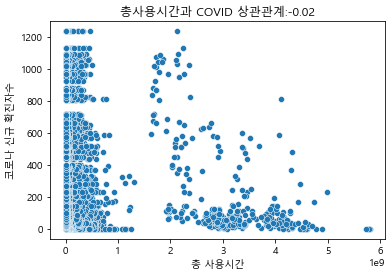

In [152]:
#timecounttotal와 covid 상관관계 계산
correlation = df['timeCountTotal'].corr(df['covid_simple'])
sns.scatterplot(df['timeCountTotal'], df['covid_simple'])
plt.title('총사용시간과 COVID 상관관계:'+str(np.round(correlation,2)))
plt.ylabel('코로나 신규 확진자수')
plt.xlabel('총 사용시간')
plt.show()

C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


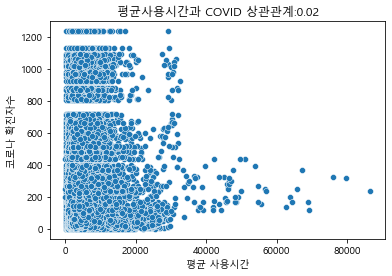

In [151]:
#timecounttotal와 covid 상관관계 계산
correlation = df['avgUsedTime'].corr(df['covid_simple'])
sns.scatterplot(df['avgUsedTime'], df['covid_simple'])
plt.title('평균사용시간과 COVID 상관관계:'+str(np.round(correlation,2)))
plt.ylabel('코로나 확진자수')
plt.xlabel('평균 사용시간')
plt.show()

C:\Users\sh921\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


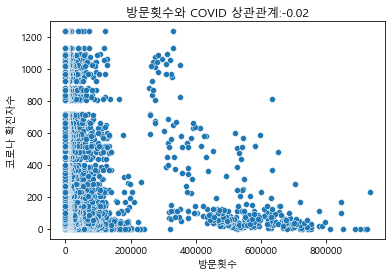

In [154]:
#timecounttotal와 covid 상관관계 계산
correlation = df['userCountTotal'].corr(df['covid_simple'])
sns.scatterplot(df['userCountTotal'], df['covid_simple'])
plt.title('방문횟수와 COVID 상관관계:'+str(np.round(correlation,2)))
plt.ylabel('코로나 확진자수')
plt.xlabel('방문횟수')
plt.show()

# control 용 변수들 만들기

In [189]:
df = pd.read_csv('master_did_210918_2.csv')

In [190]:
df = df.drop(df[['Unnamed: 0','Unnamed: 0.1']], axis=1)

In [191]:
df[['payType']].head()

,payType
0,P
1,P
2,P
3,P
4,P


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gameCode            138593 non-null  int64  
 1   gameName            138593 non-null  object 
 2   gameRank            138593 non-null  int64  
 3   gameRankUpDown      138593 non-null  int64  
 4   gameShares          138593 non-null  float64
 5   gameTypeShares      138593 non-null  float64
 6   sharesUpDown        138593 non-null  float64
 7   timeCountTotal      138593 non-null  int64  
 8   avgUsedTime         138593 non-null  int64  
 9   userCountTotal      138593 non-null  int64  
 10  useStoreCount       138593 non-null  int64  
 11  gameRegDate         138593 non-null  object 
 12  publisher           138593 non-null  object 
 13  payType             138593 non-null  object 
 14  gameTypeName        138593 non-null  object 
 15  date                138593 non-nul

# 상용유무

In [193]:
df['payType'] = df['payType'].replace('P',1)

In [195]:
df['payType'] = df['payType'].replace('F',0)

In [201]:
df['payType'].dtypes

dtype('int64')

# 요일 변수 생성

In [204]:
#요일 변수 생성
#datetime으로 변수형 변환
df['date'] = pd.to_datetime(df['date'])

#요일추출(0=mon, 6=sun)
df['weekday'] = df['date'].dt.weekday

In [206]:
df[['weekday']]

,weekday
0,3
1,4
2,5
3,6
4,0
...,...
138588,5
138589,6
138590,0
138591,1


# 주말변수

In [207]:
def is_weekend(x):
    if x ==5: #토요일
        return 1
    elif x ==6: #일요일
        return 1
    else:
        return 0
    
#weekday 변수에 is_weekend 함수를 적용하여 'weekend' 변수 생성
df['weekend'] = df['weekday'].apply(is_weekend)

In [208]:
df[['weekend']].head()

,weekend
0,0
1,0
2,1
3,1
4,0


# 출시일 경과변수 

In [215]:
# 날짜형식으로 변환
df['gameRegDate'] = pd.to_datetime(df['gameRegDate'])
df['gameRegDate'].head()

0   2011-12-22
1   2011-12-22
2   2011-12-22
3   2011-12-22
4   2011-12-22
Name: gameRegDate, dtype: datetime64[ns]

In [240]:
from datetime import datetime
df['Regdate'] = df['date'] - df['gameRegDate']

In [241]:
df[['Regdate']]

,Regdate
0,2583 days
1,2584 days
2,2585 days
3,2586 days
4,2587 days
...,...
138588,37 days
138589,38 days
138590,39 days
138591,40 days


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   gameCode            138593 non-null  int64         
 1   gameName            138593 non-null  object        
 2   gameRank            138593 non-null  int64         
 3   gameRankUpDown      138593 non-null  int64         
 4   gameShares          138593 non-null  float64       
 5   gameTypeShares      138593 non-null  float64       
 6   sharesUpDown        138593 non-null  float64       
 7   timeCountTotal      138593 non-null  int64         
 8   avgUsedTime         138593 non-null  int64         
 9   userCountTotal      138593 non-null  int64         
 10  useStoreCount       138593 non-null  int64         
 11  gameRegDate         138593 non-null  datetime64[ns]
 12  publisher           138593 non-null  object        
 13  payType             138593 no

# 게임 장르 변수

In [258]:
df = pd.get_dummies(df, columns=['gameTypeName'])

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gameCode            138593 non-null  int64  
 1   gameName            138593 non-null  object 
 2   gameRank            138593 non-null  int64  
 3   gameRankUpDown      138593 non-null  int64  
 4   gameShares          138593 non-null  float64
 5   gameTypeShares      138593 non-null  float64
 6   sharesUpDown        138593 non-null  float64
 7   timeCountTotal      138593 non-null  int64  
 8   avgUsedTime         138593 non-null  int64  
 9   userCountTotal      138593 non-null  int64  
 10  useStoreCount       138593 non-null  int64  
 11  gameRegDate         138593 non-null  object 
 12  publisher           138593 non-null  object 
 13  payType             138593 non-null  int64  
 14  date                138593 non-null  object 
 15  dateCount           138593 non-nul

In [260]:
df.to_csv('master_did_210918_3.csv')

In [261]:
df = pd.read_csv("master_did_210918_3.csv")

In [262]:
df.head()

,Unnamed: 0,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
0,0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,...,0,1,0,0,0,0,0,0,0,0
1,1,545,리그 오브 레전드,1,0,32.64,89.43,0.04,2789391932,5751,...,0,1,0,0,0,0,0,0,0,0
2,2,545,리그 오브 레전드,1,0,32.61,89.25,-0.02,3569515214,6057,...,0,1,0,0,0,0,0,0,0,0
3,3,545,리그 오브 레전드,1,0,32.67,89.69,0.07,3579861781,6175,...,0,1,0,0,0,0,0,0,0,0
4,4,545,리그 오브 레전드,1,0,32.89,90.04,0.22,2617928106,6011,...,0,1,0,0,0,0,0,0,0,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          138593 non-null  int64  
 1   gameCode            138593 non-null  int64  
 2   gameName            138593 non-null  object 
 3   gameRank            138593 non-null  int64  
 4   gameRankUpDown      138593 non-null  int64  
 5   gameShares          138593 non-null  float64
 6   gameTypeShares      138593 non-null  float64
 7   sharesUpDown        138593 non-null  float64
 8   timeCountTotal      138593 non-null  int64  
 9   avgUsedTime         138593 non-null  int64  
 10  userCountTotal      138593 non-null  int64  
 11  useStoreCount       138593 non-null  int64  
 12  gameRegDate         138593 non-null  object 
 13  publisher           138593 non-null  object 
 14  payType             138593 non-null  int64  
 15  date                138593 non-nul

<ipython-input-269-7834cbb533ae>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

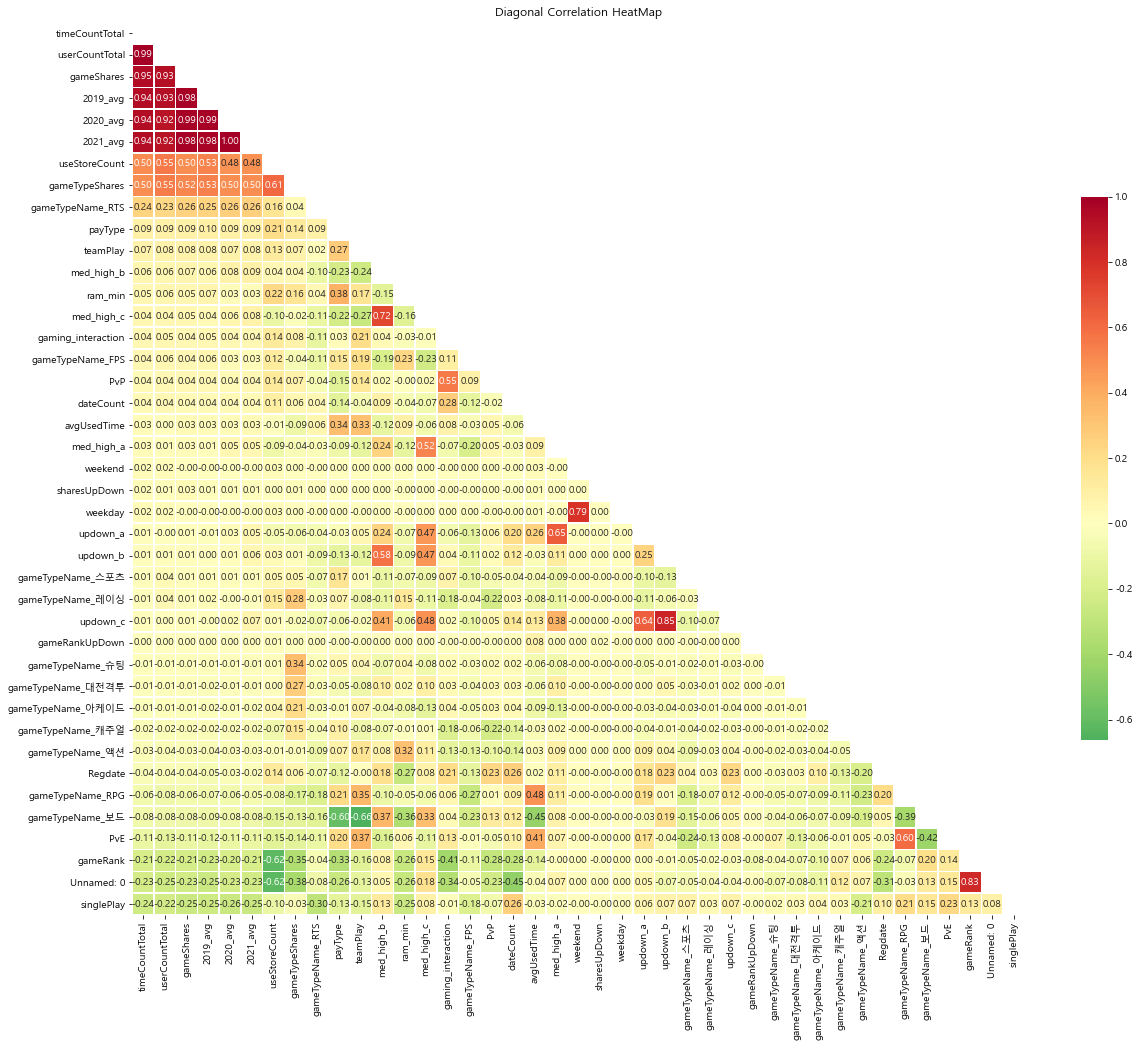

In [269]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(df.select_dtypes(include=numerics).drop(
    ['gameCode'], axis =1).columns)
regular_temp = df[numeric_cols].copy()

# 상관관계 도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'timeCountTotal', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(20, 20))
corr = regular_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [282]:
df2 = pd.read_csv('master_did_210918_2.csv')

In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138593 entries, 0 to 138592
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          138593 non-null  int64  
 1   Unnamed: 0.1        138593 non-null  int64  
 2   gameCode            138593 non-null  int64  
 3   gameName            138593 non-null  object 
 4   gameRank            138593 non-null  int64  
 5   gameRankUpDown      138593 non-null  int64  
 6   gameShares          138593 non-null  float64
 7   gameTypeShares      138593 non-null  float64
 8   sharesUpDown        138593 non-null  float64
 9   timeCountTotal      138593 non-null  int64  
 10  avgUsedTime         138593 non-null  int64  
 11  userCountTotal      138593 non-null  int64  
 12  useStoreCount       138593 non-null  int64  
 13  gameRegDate         138593 non-null  object 
 14  publisher           138593 non-null  object 
 15  payType             138593 non-nul

In [279]:
df2 = df2.groupby('gameTypeName').mean()

In [281]:
df2.to_csv('gameType.csv')

In [295]:
df = pd.read_csv('master_did_210918_3.csv')

In [296]:
df.head()

,Unnamed: 0,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
0,0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,...,0,1,0,0,0,0,0,0,0,0
1,1,545,리그 오브 레전드,1,0,32.64,89.43,0.04,2789391932,5751,...,0,1,0,0,0,0,0,0,0,0
2,2,545,리그 오브 레전드,1,0,32.61,89.25,-0.02,3569515214,6057,...,0,1,0,0,0,0,0,0,0,0
3,3,545,리그 오브 레전드,1,0,32.67,89.69,0.07,3579861781,6175,...,0,1,0,0,0,0,0,0,0,0
4,4,545,리그 오브 레전드,1,0,32.89,90.04,0.22,2617928106,6011,...,0,1,0,0,0,0,0,0,0,0


In [297]:
df3 = df.groupby('publisher').mean()
df3

,Unnamed: 0,gameCode,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
publisher,,,,,,,,,,,,,,,,,,,,,
(주)에이케이인터렉티브,24622.000000,66.000000,34.352381,0.012245,0.154381,1.224422,1.088435e-04,1.077821e+07,5966.374150,1851.745578,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(주)펄어비스,47059.500000,717.500000,60.398980,-0.037755,0.234112,1.874653,2.040816e-04,1.726965e+07,7156.160204,2214.100000,...,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
Origin,131014.500000,877.000000,166.652083,-0.247917,0.011062,0.080875,0.000000e+00,4.158409e+05,5278.670833,76.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Origin/스팀,125842.000000,851.000000,35.836389,-0.004231,0.225712,0.886798,2.115656e-04,1.648593e+07,4713.492243,3871.834979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Uplay,128795.000000,863.000000,108.154198,-0.068702,0.024458,0.091344,-1.068702e-04,1.416219e+06,6331.763359,235.265649,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
㈜웨이투빗,137907.000000,951.000000,92.136752,0.222222,0.031026,0.214786,2.564103e-04,1.313075e+06,12663.649573,109.307692,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
그라비티,81217.000000,41.000000,106.104762,0.048980,0.023020,0.156762,-5.442177e-05,1.290012e+06,5420.661224,235.744218,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
네오액트,123112.000000,234.000000,218.859864,0.082993,0.010000,0.057878,0.000000e+00,1.183447e+05,4439.340136,27.414966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
네오위즈,68879.500000,313.214286,118.907483,-0.052770,0.048667,4.876758,-2.040816e-05,3.022652e+06,3951.422157,891.412342,...,0.071429,0.000000,0.071429,0.000000,0.571429,0.000000,0.071429,0.000000,0.000000,0.000000


In [299]:
df3.to_csv('publisher.csv')

In [300]:
df4 = df.groupby('med_high_a').mean()
df4

,Unnamed: 0,gameCode,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
med_high_a,,,,,,,,,,,,,,,,,,,,,
0,66490.760036,479.289496,105.761003,-0.030995,0.419322,6.278506,-0.000390,3.129734e+07,4679.706315,7095.718124,...,0.261374,0.074510,0.000000,0.022226,0.212416,0.011113,0.085048,0.033339,0.072423,0.020155
1,71856.738758,392.051067,105.661785,0.000704,0.637793,5.068243,0.000459,4.540371e+07,5228.321597,8167.394719,...,0.368468,0.060866,0.020289,0.000000,0.284042,0.000000,0.040992,0.000000,0.128827,0.027466


In [301]:
df4.to_csv('2019년 대비 2020년 그룹별.csv')

In [302]:
df5 = df.groupby('med_high_b').mean()
df5

,Unnamed: 0,gameCode,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
med_high_b,,,,,,,,,,,,,,,,,,,,,
0,67378.034462,512.633176,100.240619,-0.041779,0.282463,4.994445,-0.000233,2.105763e+07,5321.373905,4633.774573,...,0.362599,0.094187,0.000000,0.02164,0.087798,0.01082,0.088004,0.021640,0.076683,0.035243
1,71139.732042,357.788082,110.965994,0.011873,0.774889,6.271948,0.000330,5.560443e+07,4625.386349,10561.197286,...,0.273874,0.041605,0.020803,0.00000,0.405652,0.00000,0.037034,0.010401,0.126160,0.013147


In [303]:
df5.to_csv('2020년 대비 2021년 그룹별.csv')

In [307]:
df6 = df.groupby('ram_min').mean()
df6

,Unnamed: 0,gameCode,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,userCountTotal,...,gameTypeName_RPG,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼
ram_min,,,,,,,,,,,,,,,,,,,,,
0.0320,84157.000000,486.000000,145.273469,-0.093878,0.012313,0.554762,1.360544e-05,6.056336e+05,2398.704762,254.179592,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0625,95917.000000,467.000000,161.395918,0.027211,0.010109,0.381442,0.000000e+00,3.885688e+05,3069.670748,129.085714,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0640,73132.000000,471.000000,119.450340,-0.006803,0.018544,0.849388,-2.721088e-05,9.040774e+05,2070.348299,443.517007,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1250,103818.250000,396.000000,166.096939,0.071769,0.010452,0.272272,-3.401361e-06,3.899041e+05,4029.047279,572.780272,...,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1280,57697.000000,216.571429,88.046259,0.018076,0.056768,3.396641,-5.830904e-06,3.656517e+06,2829.116035,2167.646647,...,0.142857,0.000000,0.000000,0.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000
0.2500,106942.000000,221.250000,178.039796,0.063776,0.010381,0.274029,-5.900420e-22,3.362063e+05,3675.337755,94.773469,...,0.125000,0.000000,0.000000,0.000000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000
0.2560,60453.250000,89.000000,85.479932,-0.002041,0.046167,7.929303,-6.972789e-05,2.938503e+06,3258.505782,1147.952381,...,0.250000,0.000000,0.125000,0.000000,0.375000,0.000000,0.125000,0.000000,0.000000,0.000000
0.3125,112822.000000,485.000000,194.194558,-0.063946,0.010000,0.197673,0.000000e+00,2.067113e+05,1752.697959,118.661224,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.3200,42262.000000,16.000000,60.998639,0.024490,0.066735,4.186136,-1.416101e-20,4.305032e+06,4308.323810,1009.127891,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [305]:
df6.to_csv('2019년 대비 2021년 그룹별.csv')

In [312]:
df = pd.read_csv('master_did_210918_3.csv')
df[['date']].head()

,date
0,2019-01-17
1,2019-01-18
2,2019-01-19
3,2019-01-20
4,2019-01-21


In [316]:
ram = pd.read_csv('med_ram.csv')
ram.head()

,gameCode,med_ram
0,545,1
1,737,1
2,750,1
3,707,1
4,793,1


In [317]:
df = pd.merge(df, ram, how='left', on ='gameCode')

In [318]:
df

,Unnamed: 0,gameCode,gameName,gameRank,gameRankUpDown,gameShares,gameTypeShares,sharesUpDown,timeCountTotal,avgUsedTime,...,gameTypeName_RTS,gameTypeName_대전격투,gameTypeName_레이싱,gameTypeName_보드,gameTypeName_슈팅,gameTypeName_스포츠,gameTypeName_아케이드,gameTypeName_액션,gameTypeName_캐주얼,med_ram
0,0,545,리그 오브 레전드,1,0,32.61,89.72,-0.37,2556620797,5886,...,1,0,0,0,0,0,0,0,0,1
1,1,545,리그 오브 레전드,1,0,32.64,89.43,0.04,2789391932,5751,...,1,0,0,0,0,0,0,0,0,1
2,2,545,리그 오브 레전드,1,0,32.61,89.25,-0.02,3569515214,6057,...,1,0,0,0,0,0,0,0,0,1
3,3,545,리그 오브 레전드,1,0,32.67,89.69,0.07,3579861781,6175,...,1,0,0,0,0,0,0,0,0,1
4,4,545,리그 오브 레전드,1,0,32.89,90.04,0.22,2617928106,6011,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138588,138588,971,Cyberpunk 2077,118,-15,0.02,0.08,0.00,673302,7014,...,0,0,0,0,0,0,0,0,0,0
138589,138589,971,Cyberpunk 2077,126,-8,0.01,0.07,-0.01,592495,6511,...,0,0,0,0,0,0,0,0,0,0
138590,138590,971,Cyberpunk 2077,138,-12,0.01,0.06,0.00,335612,8186,...,0,0,0,0,0,0,0,0,0,0
138591,138591,971,Cyberpunk 2077,127,11,0.01,0.07,0.00,407664,7994,...,0,0,0,0,0,0,0,0,0,0


In [319]:
df.to_csv('master_did_210918_4.csv')